# ESERCITAZIONE N 7

In [1]:
#week 12 TITANIC
import pandas as pd
file_path="C:/Users/PANTANO/Desktop/Data Analyst/LEZIONI/3 Terzo Modulo Python/dataset/Titanic.csv"
df = pd.read_csv(file_path)

In [2]:
df
#sopravvissuto 0 =no, 10=si. 
#sibSp= numero di parenti o coniugi a bordo 
#Parch numero di genitori o figli a bordo del titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# quanti ponti ci sono nel titanic
df["Cabin"].dtypes
ponte=df["Cabin"].str[0] # prendere la prima lettera
nome_ponti=ponte.dropna().unique()
print("Il numero di ponti nel titanic era:", len(nome_ponti))

Il numero di ponti nel titanic era: 8


In [4]:
#Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco
import seaborn as sns
import matplotlib.pyplot as plt

numero_pc=df["Pclass"].value_counts().sort_index()
numero_pc

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1447636ccd0>,
 [Text(0, 0, '1ª Classe'), Text(1, 0, '2ª Classe'), Text(2, 0, '3ª Classe')])

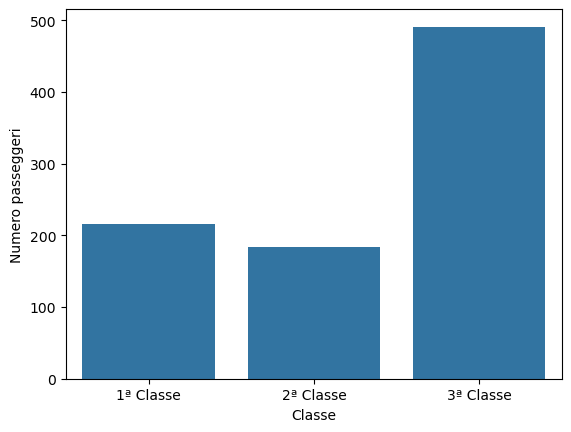

In [5]:
plt.figure()
sns.barplot(x=numero_pc.index, y=numero_pc.values)
plt.xlabel("Classe")
plt.ylabel("Numero passeggeri")
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])

([<matplotlib.axis.XTick at 0x1447643fb90>,
 [Text(0, 0, 'Non Surv'), Text(1, 0, 'Surv')])

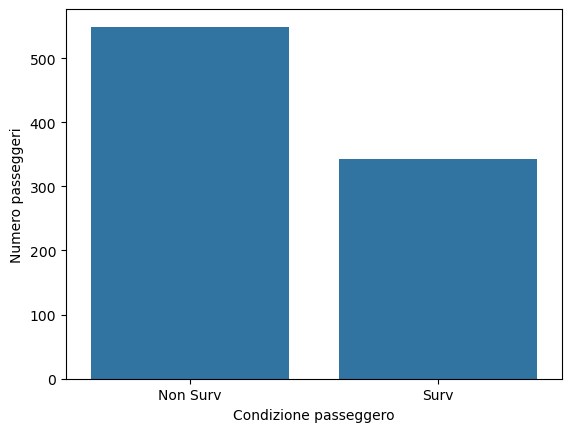

In [6]:
#Fare la stessa cosa per la colonna alive
plt.figure()
pass_sopravvissuti=df["Survived"].value_counts()
sns.barplot(x=pass_sopravvissuti.index, y=pass_sopravvissuti.values)
plt.xlabel("Condizione passeggero")
plt.ylabel("Numero passeggeri")
plt.xticks(ticks=[0, 1], labels=['Non Surv', 'Surv'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


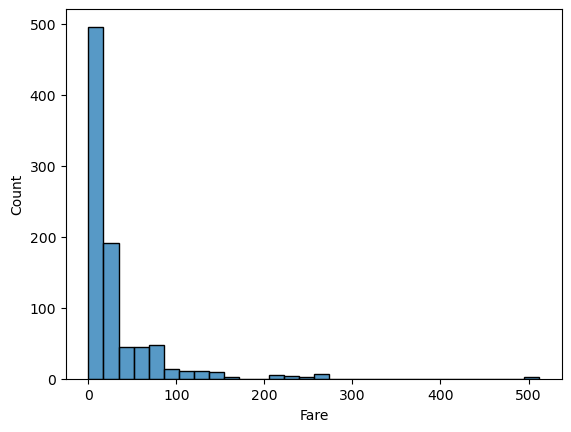

In [7]:
#Qual era la distribuzione delle tariffe (fare)?
sns.histplot(df["Fare"].dropna(), kde=False, bins=30)
df.describe()

In [8]:
df_filtered = df[(df["Fare"].dropna() >= 250) ]
len(df_filtered.value_counts())

8

<Axes: xlabel='Fare', ylabel='Count'>

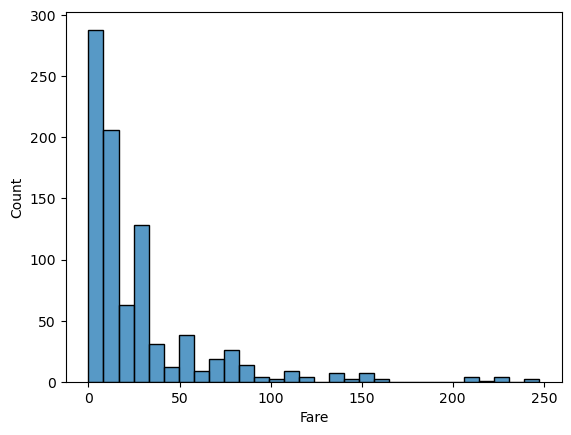

In [9]:
filtro=df[(df["Fare"].dropna()>=0) & (df["Fare"].dropna()<=250)]
sns.histplot(filtro["Fare"], kde=False, bins=30)

([<matplotlib.axis.XTick at 0x14476652f50>,
 [Text(0, 0, '1ª Classe'), Text(1, 0, '2ª Classe'), Text(2, 0, '3ª Classe')])

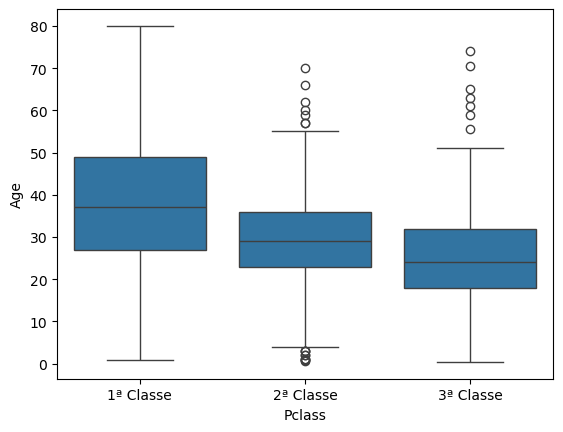

In [10]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot

sns.boxplot(x=df["Pclass"], y=df["Age"])
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])


(-15.0, 93.0)

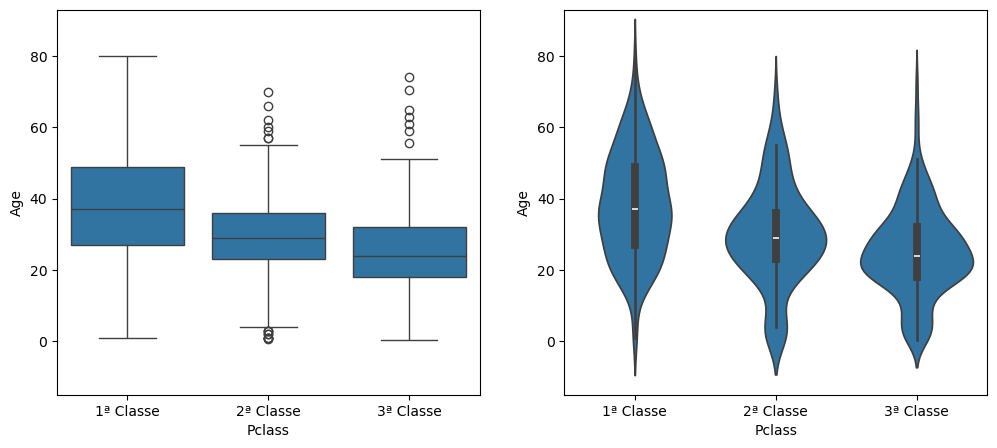

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["Pclass"], y=df["Age"], ax=axs[0])
axs[0].set_xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])

sns.violinplot(x=df["Pclass"], y=df["Age"], ax=axs[1])
axs[1].set_xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])

axs[0].set_ylim(-15, 93)
axs[1].set_ylim(-15, 93)

(-20.0, 300.0)

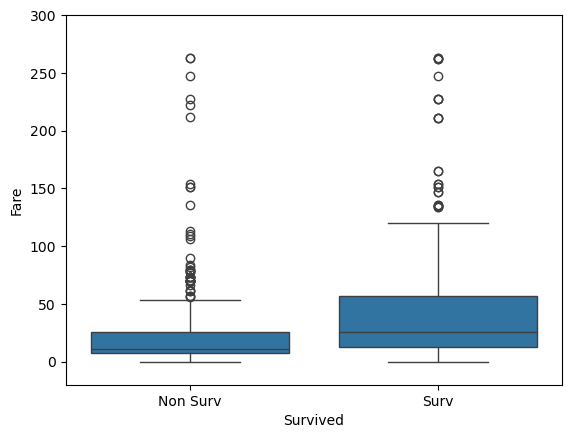

In [12]:
#Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?
sns.boxplot(x=df["Survived"], y=df["Fare"])
plt.xticks(ticks=[0, 1], labels=['Non Surv', 'Surv'])
plt.ylim(-20, 300) #c'è un outlier che con questa limitazione non è visibile

# IMPORTARE STOCKDATA

In [13]:
import pandas as pd
file_path="C:/Users/PANTANO/Desktop/Data Analyst/LEZIONI/3 Terzo Modulo Python/dataset/stockdata.csv"
sd = pd.read_csv(file_path)
sd
# database sulle azioni, il GSPC 

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [14]:
sd.dtypes

MSFT    float64
IBM     float64
SBUX    float64
AAPL    float64
GSPC    float64
Date     object
dtype: object

In [15]:
sd['Date'] = pd.to_datetime(sd['Date'])
sd.dtypes

MSFT           float64
IBM            float64
SBUX           float64
AAPL           float64
GSPC           float64
Date    datetime64[ns]
dtype: object

In [16]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   MSFT    2306 non-null   float64       
 1   IBM     2306 non-null   float64       
 2   SBUX    2306 non-null   float64       
 3   AAPL    2306 non-null   float64       
 4   GSPC    2306 non-null   float64       
 5   Date    2306 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 108.2 KB


In [17]:
sd.describe()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306
mean,28.737785,136.239600,23.213089,54.719810,1459.999869,2011-07-31 21:25:45.533391104
min,12.630211,61.274273,3.284911,10.345740,676.530029,2007-01-03 00:00:00
25%,22.582537,102.407469,10.792787,22.929971,1198.417481,2009-04-17 18:00:00
50%,24.990737,143.833125,17.896952,49.327484,1402.370056,2011-07-30 12:00:00
75%,33.873379,172.566340,35.305682,78.102594,1770.579986,2013-11-12 18:00:00
max,56.146870,198.948796,63.098822,130.671320,2130.820068,2016-03-01 00:00:00
std,9.471737,37.376360,15.522634,34.645282,361.673516,NaN


In [18]:
sd.isnull().sum()

MSFT    0
IBM     0
SBUX    0
AAPL    0
GSPC    0
Date    0
dtype: int64

<Axes: xlabel='Date', ylabel='AAPL'>

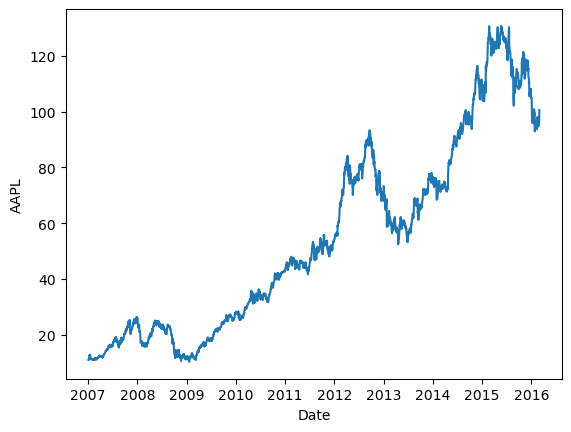

In [19]:
#Visualizziamo l'andamento delle azioni della Apple ("AAPL")
sns.lineplot(x=sd["Date"], y=sd["AAPL"])

(0.0, 200.0)

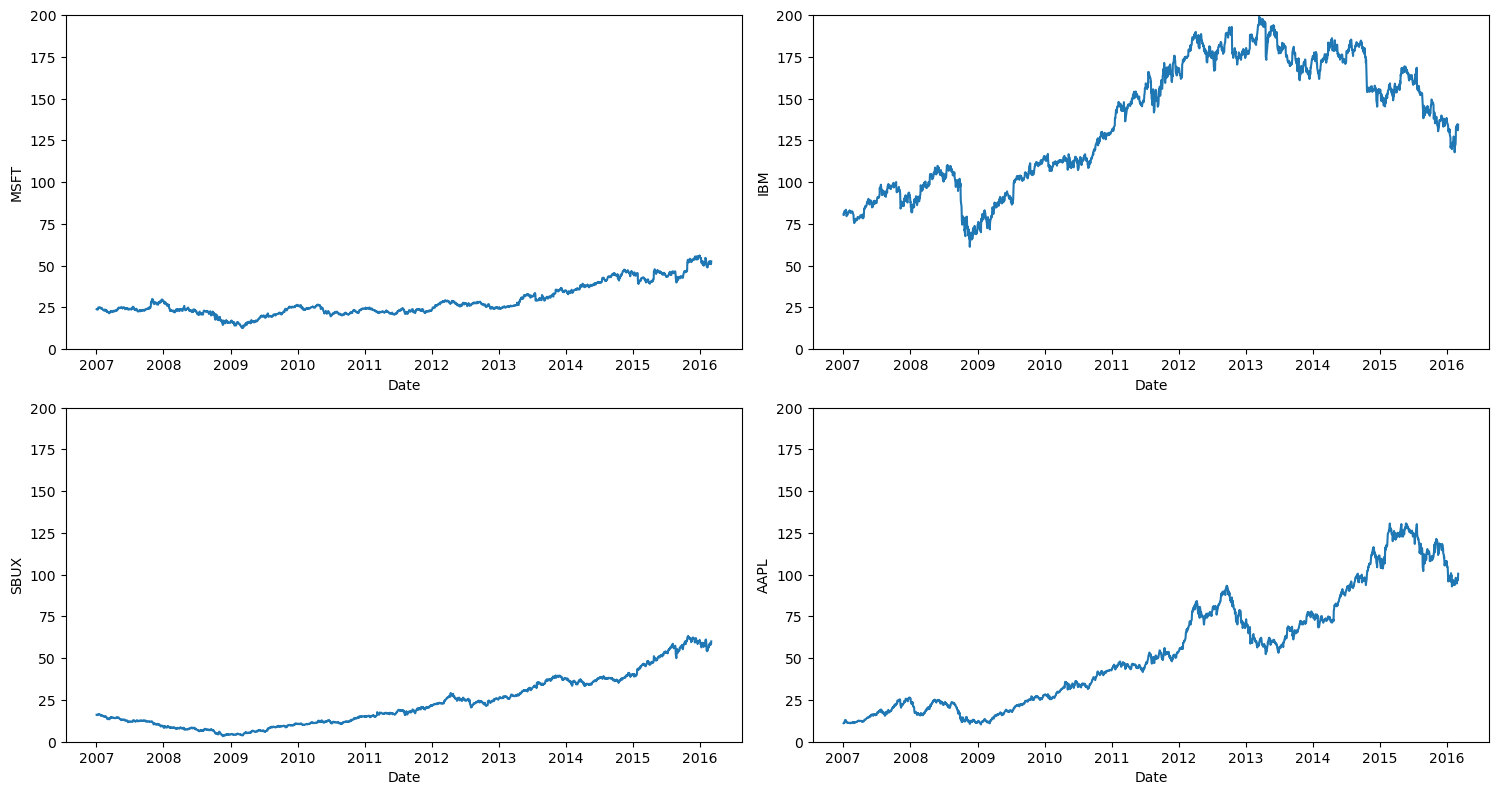

In [20]:
#Visualizziamo l'andamento di tutte le azioni del dataset
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

#MSFT	IBM	SBUX	AAPL	GSPC	
sns.lineplot(x=sd["Date"], y=sd["MSFT"], ax=axs[0,0])
sns.lineplot(x=sd["Date"], y=sd["IBM"], ax=axs[0,1])
sns.lineplot(x=sd["Date"], y=sd["SBUX"], ax=axs[1,0])
sns.lineplot(x=sd["Date"], y=sd["AAPL"], ax=axs[1,1])

plt.tight_layout()

axs[0,0].set_ylim(0, 200)
axs[0,1].set_ylim(0, 200)
axs[1,0].set_ylim(0, 200)
axs[1,1].set_ylim(0, 200)

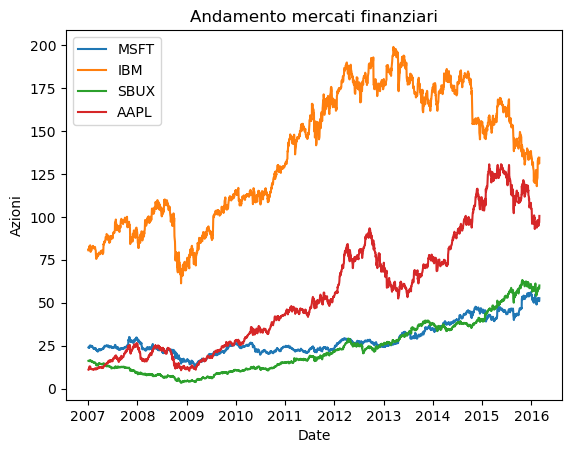

In [21]:
#alternativa tutti in un solo grafico 
sns.lineplot(x=sd["Date"], y=sd["MSFT"], label="MSFT")
sns.lineplot(x=sd["Date"], y=sd["IBM"], label="IBM")
sns.lineplot(x=sd["Date"], y=sd["SBUX"], label="SBUX")
sns.lineplot(x=sd["Date"], y=sd["AAPL"], label="AAPL")

plt.ylabel('Azioni')
plt.title("Andamento mercati finanziari")
plt.legend()

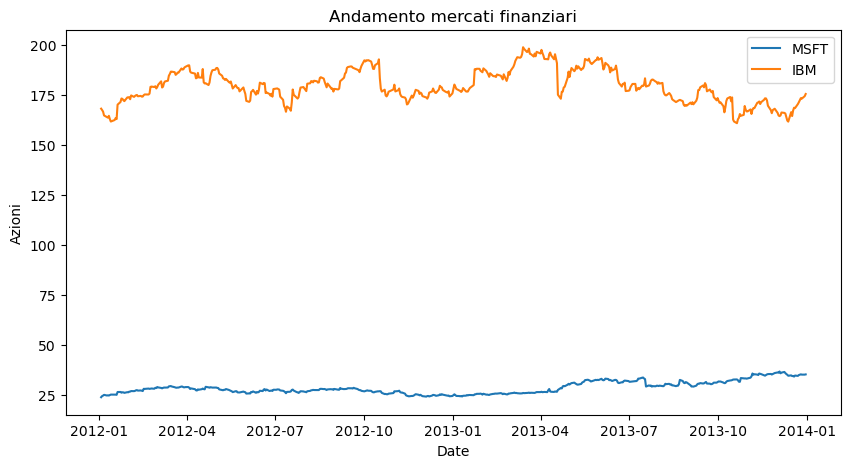

In [22]:
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
filtro_anno=(sd["Date"].dt.year==2012) | (sd["Date"].dt.year==2013)
sd_anno=sd[filtro_anno]

#grafico
plt.figure(figsize=(10,5))
sns.lineplot(x=sd_anno["Date"], y=sd_anno["MSFT"], label="MSFT")
sns.lineplot(x=sd_anno["Date"], y=sd_anno["IBM"], label="IBM")

plt.ylabel('Azioni')
plt.title("Andamento mercati finanziari")
plt.legend()

Il bin con il massimo delle occorrenze è: 22.67, 24.35
Il massimo delle occorrenze è: 404


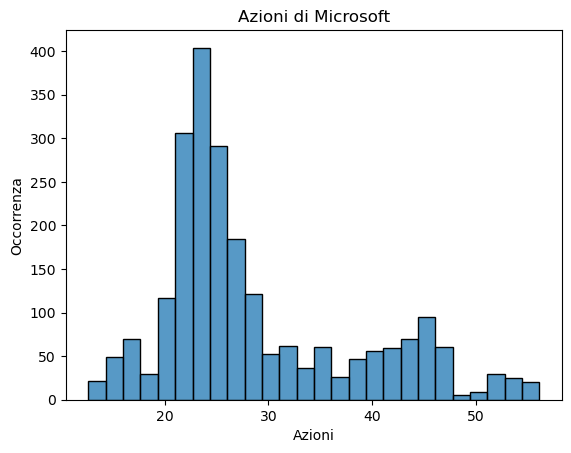

In [23]:
#Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
import numpy as np

counts, bin_edges = np.histogram(sd['MSFT'], bins='auto')
max_count = np.argmax(counts) # argmax restituisce l'indice dell'elemento che contiene il valore massimo
bin_min=round(bin_edges[max_count],2)
bin_max=round(bin_edges[max_count + 1],2)

sns.histplot(sd['MSFT'])
plt.xlabel('Azioni')
plt.ylabel('Occorrenza')
plt.title('Azioni di Microsoft')

print(f"Il bin con il massimo delle occorrenze è: {bin_min}, {bin_max}")
print(f"Il massimo delle occorrenze è: {counts[max_count]}")

# ESERCIZIO METAL BANDS 2017

In [24]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path="C:/Users/PANTANO/Desktop/Data Analyst/LEZIONI/3 Terzo Modulo Python/dataset/election.csv"
el = pd.read_csv(file_path)
el

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


Text(0, 0.5, 'Candidati')

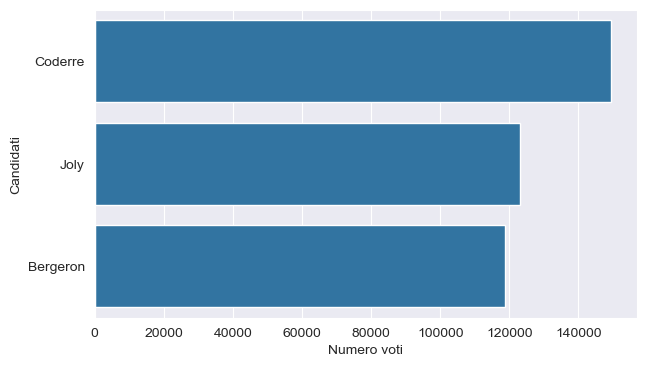

In [26]:
#Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
somma_colonne=el[["Coderre", 'Bergeron', 'Joly']].sum()
somma_colonne = somma_colonne.sort_values(ascending=False) 

plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")
sns.barplot(x=somma_colonne.values, y=somma_colonne.index)
plt.xlabel("Numero voti")
plt.ylabel("Candidati")

<Axes: xlabel='district_id', ylabel='total'>

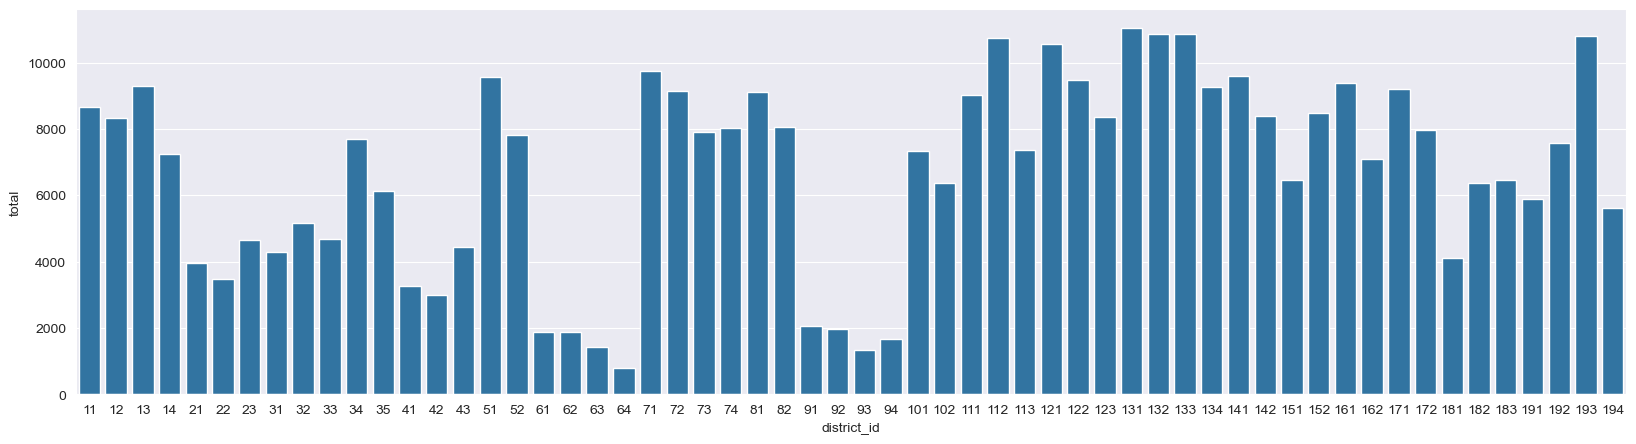

In [27]:
#Con un grafico a barre confrontiamo il numero di votanti per ogni distretto
plt.figure(figsize=(20, 5))
sns.set_style("darkgrid")
sns.barplot(x=el["district_id"], y=el["total"])

In [28]:
#Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato
comp4=el.head(4)
comp4

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111


<Figure size 700x600 with 0 Axes>

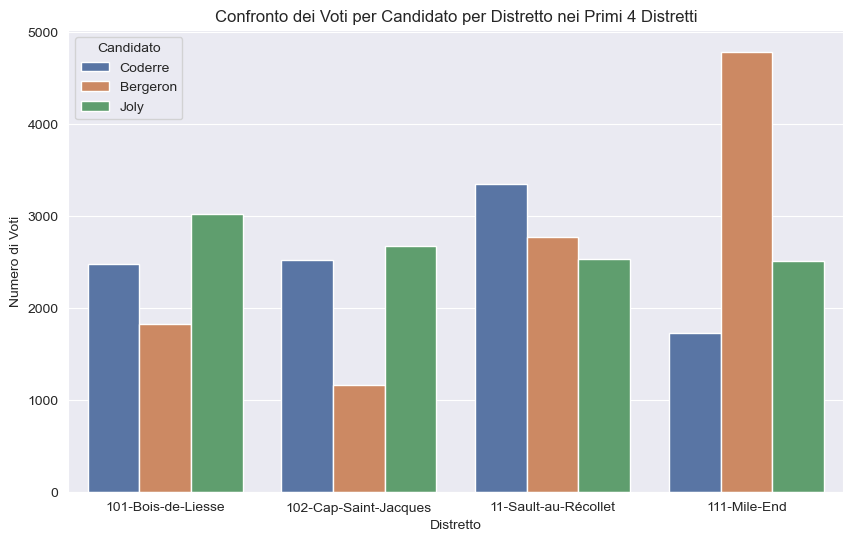

In [29]:
plt.figure(figsize=(7, 6))
comp = pd.melt(comp4, id_vars=["district"], value_vars=["Coderre", "Bergeron", "Joly"], var_name="Candidato", value_name="Voti_ottenuti") # passaggio per converite le colonne in righe
#conversione righe colonne, necessario per costruire il grafico


plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(data=comp, x="district", y="Voti_ottenuti", hue="Candidato", palette="deep") # x distretto, y voti, separo per candidato

plt.xlabel("Distretto")
plt.ylabel("Numero di Voti")
plt.title("Confronto dei Voti per Candidato per Distretto nei Primi 4 Distretti")

plt.legend(title="Candidato")

# importare dataset parties in New York

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path="C:/Users/PANTANO/Desktop/Data Analyst/LEZIONI/3 Terzo Modulo Python/dataset/party_in_nyc.csv"
pn = pd.read_csv(file_path)
pn

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


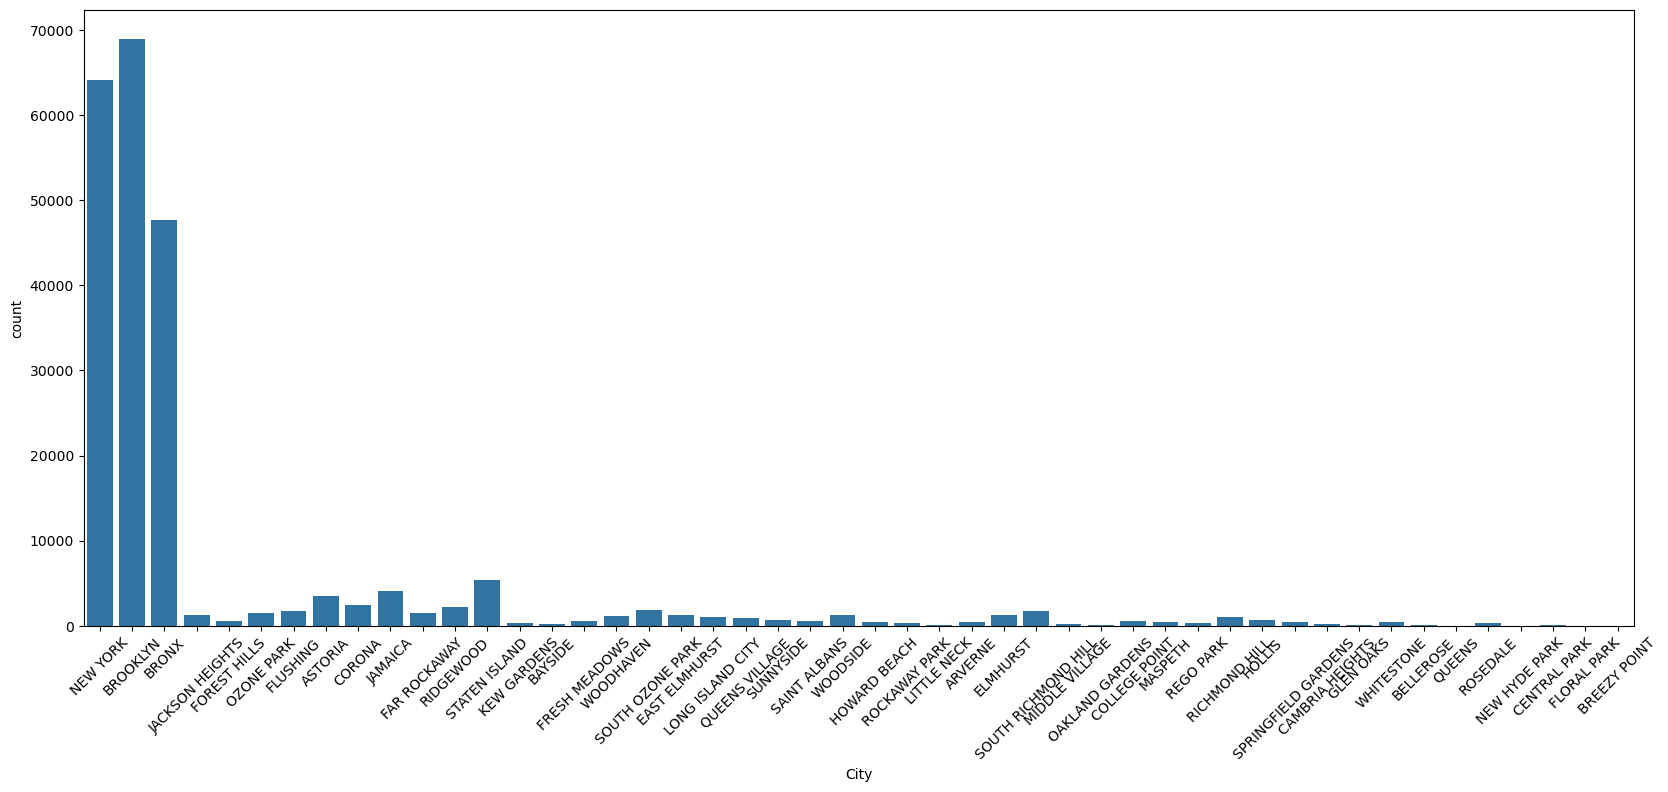

In [2]:
#realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
plt.figure(figsize=(20,8))
sns.countplot(data=pn, x="City")
plt.xticks(rotation=45)
plt.show()


In [3]:
#Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
massimo_lat= round(pn["Latitude"].max(),4)
print(("massima latitudine"), massimo_lat)

minimo_lat=round(pn["Latitude"].min(),4)
print(("minima latitudine"), minimo_lat)

massimo_long=round(pn["Longitude"].max(),4)
print(("massima longitudine"), massimo_long)

minimo_long= round(pn["Longitude"].min(),4)
print(("minimo longitudine"), minimo_long)

l1=massimo_lat-minimo_lat
l2=massimo_long-minimo_long
l1*l2

massima latitudine 40.9122
minima latitudine 40.4988
massima longitudine -73.7023
minimo longitudine -74.2513


0.2269566000000004

In [12]:
#numero di chiamate per case private
count_casa_private = pn['Location Type'].str.contains('Residential Building/House', case=False, na=False).sum()
print("Numero di chiamate ricevute da case private:", count_casa_private)

Numero di chiamate ricevute da case private: 146040


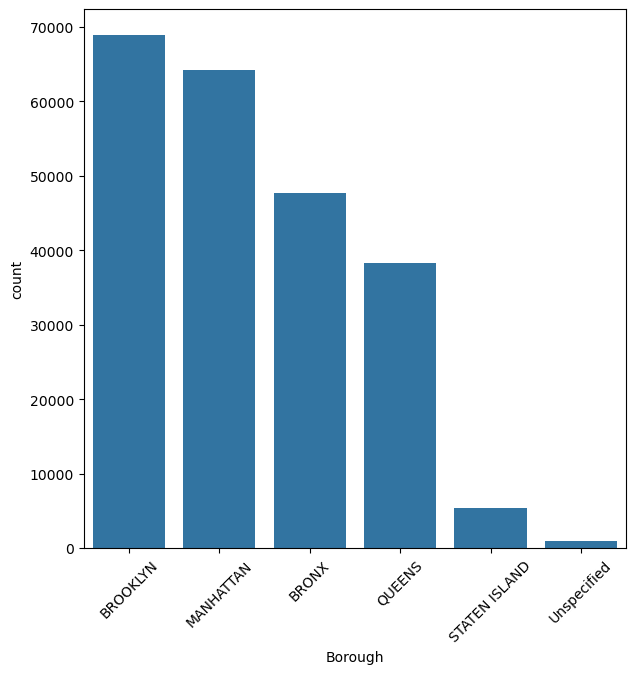

In [23]:
#Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?
plt.figure(figsize=(7,7))
sns.countplot(pn, x="Borough", order=pn['Borough'].value_counts().index) # l'order non è necessario
plt.xticks(rotation=45)
plt.show()

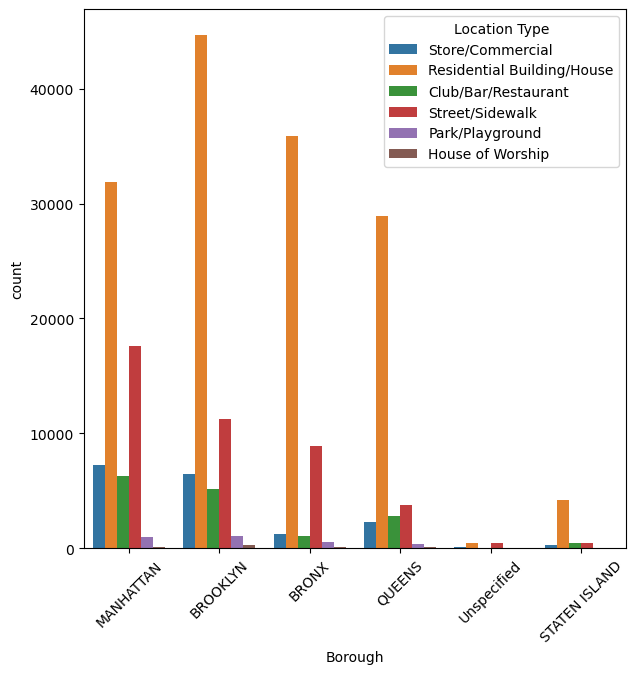

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(pn, x="Borough", hue="Location Type")
plt.xticks(rotation=45)
plt.show()